<a href="https://colab.research.google.com/github/beenleliu/machineLearningDeepLearning/blob/main/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**7.1 优化与深度学习**

本节将讨论优化与深度学习的关系，以及优化在深度学习中的挑战。在一个深度学习问题中，我们通常会预先定义一个损失函数。有了损失函数以后，我们就可以使用优化算法试图将其最小化。在优化中，这样的损失函数通常被称作优化问题的目标函数（objective function）。依据惯例，优化算法通常只考虑最小化目标函数。其实，任何最大化问题都可以很容易地转化为最小化问题，只需令目标函数的相反数为新的目标函数即可。



**7.1.1 优化与深度学习的关系**

虽然优化为深度学习提供了最小化损失函数的方法，但本质上，优化与深度学习的目标是有区别的。 在3.11节（模型选择、欠拟合和过拟合）中，我们区分了训练误差和泛化误差。 由于优化算法的目标函数通常是一个基于训练数据集的损失函数，优化的目标在于降低训练误差。 而深度学习的目标在于降低泛化误差。为了降低泛化误差，除了使用优化算法降低训练误差以外，还需要注意应对过拟合。

本章中，我们只关注优化算法在最小化目标函数上的表现，而不关注模型的泛化误差。

**7.1.2 优化在深度学习中的挑战**

我们在3.1节（线性回归）中对优化问题的解析解和数值解做了区分。深度学习中绝大多数目标函数都很复杂。因此，很多优化问题并不存在解析解，而需要使用基于数值方法的优化算法找到近似解，即数值解。本书中讨论的优化算法都是这类基于数值方法的算法。为了求得最小化目标函数的数值解，我们将通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。

优化在深度学习中有很多挑战。下面描述了其中的两个挑战，即局部最小值和鞍点。为了更好地描述问题，我们先导入本节中实验需要的包或模块。

In [ ]:
#导入包或模块
%matplotlib inline
import sys
sys.path.append("..")
#从google云端硬盘导入d2lzh_pytorch包
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/My Drive/Colab Notebooks') 
import d2lzh_pytorch as d2l
from mpl_toolkits import mplot3d # 三维画图
import numpy as np

Mounted at /content/drive


**7.1.2.1 局部最小值 local minimum**

对于目标函数$f(x)$，如果$f(x)$在$x$上的值比在$x$邻近的其他点的值更小，那么$f(x)$可能是一个局部最小值（local minimum）。如果$f(x)$在$x$上的值是目标函数在整个定义域上的最小值，那么$f(x)$是全局最小值（global minimum）。

举个例子，给定函数

$$ f(x) = x \cdot \text{cos}(\pi x), \qquad -1.0 \leq x \leq 2.0, $$

我们可以大致找出该函数的局部最小值和全局最小值的位置。需要注意的是，图中箭头所指示的只是大致位置。

深度学习模型的目标函数可能有若干局部最优值。当一个优化问题的数值解在局部最优解附近时，由于目标函数有关解的梯度接近或变成零，最终迭代求得的数值解可能只令目标函数局部最小化而非全局最小化。

Text(0, 0.5, 'f(x)')

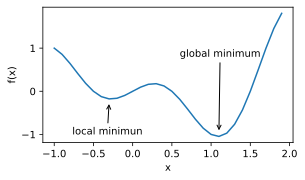

In [ ]:
#objective function
def f(x):
  return x * np.cos(np.pi * x)

d2l.set_figsize((4.5, 2.5))
x = np.arange(-1.0, 2.0, 0.1)
fig, = d2l.plt.plot(x, f(x))
fig.axes.annotate('local minimun', xy=(-0.3, -0.25), xytext=(-0.77, -1.0), arrowprops=dict(arrowstyle='->'))
fig.axes.annotate('global minimum', xy=(1.1, -0.95), xytext=(0.6, 0.8), arrowprops=dict(arrowstyle='->'))
d2l.plt.xlabel('x')
d2l.plt.ylabel('f(x)')

**7.1.2.2 鞍点 saddle point**

刚刚我们提到，梯度接近或变成零可能是由于当前解在局部最优解附近造成的。事实上，另一种可能性是当前解在鞍点（saddle point）附近。

举个例子，给定函数

$$f(x) = x^3,$$

我们可以找出该函数的鞍点位置。

Text(0, 0.5, 'f(x)')

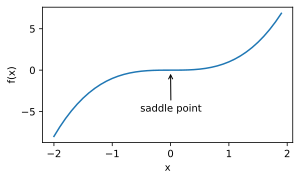

In [ ]:
x = np.arange(-2.0, 2.0, 0.1)
fig, = d2l.plt.plot(x, x**3)
fig.axes.annotate('saddle point', xy=(0, -0.2), xytext=(-0.52, -5.0), arrowprops=dict(arrowstyle='->'))
d2l.plt.xlabel('x')
d2l.plt.ylabel('f(x)')

再举个定义在二维空间的函数的例子，例如：

$$f(x, y) = x^2 - y^2.$$

我们可以找出该函数的鞍点位置。也许你已经发现了，该函数看起来像一个马鞍，而鞍点恰好是马鞍上可坐区域的中心。

在图的鞍点位置，目标函数在$x$轴方向上是局部最小值，但在$y$轴方向上是局部最大值。

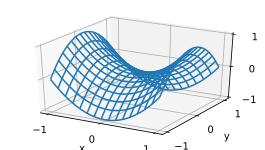

In [ ]:
x, y = np.mgrid[-1:1:31j, -1:1:31j]
z = x**2 - y**2

ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x,y,z, **{'rstride':2, 'cstride':2})
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y');

假设一个函数的输入为$k$维向量，输出为标量，那么它的海森矩阵（Hessian matrix）有$k$个特征值。该函数在梯度为0的位置上可能是局部最小值、局部最大值或者鞍点。

当函数的海森矩阵在梯度为零的位置上的特征值全为正时，该函数得到局部最小值。

当函数的海森矩阵在梯度为零的位置上的特征值全为负时，该函数得到局部最大值。

当函数的海森矩阵在梯度为零的位置上的特征值有正有负时，该函数得到鞍点。
随机矩阵理论告诉我们，对于一个大的高斯随机矩阵来说，任一特征值是正或者是负的概率都是0.5 [1]。那么，以上第一种情况的概率为 $0.5^k$。由于深度学习模型参数通常都是高维的（$k$很大），目标函数的鞍点通常比局部最小值更常见。

在深度学习中，虽然找到目标函数的全局最优解很难，但这并非必要。我们将在本章接下来的几节中逐一介绍深度学习中常用的优化算法，它们在很多实际问题中都能够训练出十分有效的深度学习模型。

**7.2 梯度下降和随机梯度下降**

在本节中，我们将介绍梯度下降（gradient descent）的工作原理。虽然梯度下降在深度学习中很少被直接使用，但理解梯度的意义以及沿着梯度反方向更新自变量可能降低目标函数值的原因是学习后续优化算法的基础。随后，我们将引出随机梯度下降（stochastic gradient descent）。

**7.2.1 一维梯度下降**

我们先以简单的一维梯度下降为例，解释梯度下降算法可能降低目标函数值的原因。假设连续可导的函数$f: \mathbb{R} \rightarrow \mathbb{R}$的输入和输出都是标量。给定绝对值足够小的数$\epsilon$，根据泰勒展开公式，我们得到以下的近似：

$$f(x + \epsilon) \approx f(x) + \epsilon f'(x) .$$

这里$f'(x)$是函数$f$在$x$处的梯度。一维函数的梯度是一个标量，也称导数。

接下来，找到一个常数$\eta > 0$，使得$\left|\eta f'(x)\right|$足够小，那么可以将$\epsilon$替换为$-\eta f'(x)$并得到

$$f(x - \eta f'(x)) \approx f(x) -  \eta f'(x)^2.$$

如果导数$f'(x) \neq 0$，那么$\eta f'(x)^2>0$，所以

$$f(x - \eta f'(x)) \lesssim f(x).$$

这意味着，如果通过

$$x \leftarrow x - \eta f'(x)$$

来迭代$x$，函数$f(x)$的值可能会降低。因此在梯度下降中，我们先选取一个初始值$x$和常数$\eta > 0$，然后不断通过上式来迭代$x$，直到达到停止条件，例如$f'(x)^2$的值已足够小或迭代次数已达到某个值。

下面我们以目标函数$f(x)=x^2$为例来看一看梯度下降是如何工作的。虽然我们知道最小化$f(x)$的解为$x=0$，这里依然使用这个简单函数来观察$x$是如何被迭代的。首先，导入本节实验所需的包或模块。

In [ ]:
#导入包或模块
%matplotlib inline
import numpy as np
import torch
import math
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

接下来使用$x=10$作为初始值，并设$\eta=0.2$。使用梯度下降对$x$迭代10次，可见最终$x$的值较接近最优解。

In [ ]:
def gradient_descent(initial_x, epochs, lr,):
  '''
  gradient_descent:梯度下降函数
  initial_x:初始值x
  epochs:迭代次数
  lr:learning rate
  results:迭代10次后的x值
  '''
  x = initial_x #initial value
  results = [x] #存放每次迭代的x值
  for i in range(epochs):
    x -= lr * 2 * x  # f(x) = x * x的导数为f'(x) = 2 * x
    results.append(x)
    #print(x)
  print('epoch 10, x:', x)
  return results

#初始值为10，迭代次数为10，学习率为0.2
res_1 = gradient_descent(10, 10, 0.2) #此时的lr(learning rate=0.2)

epoch 10, x: 0.06046617599999997


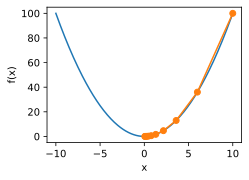

In [ ]:
#绘制自变量x的迭代轨迹
def show_trace(res):
  '''
  show_trace:展现x迭代的轨迹
  '''
  n = max(abs(min(res)), abs(max(res)), 10)
  f_line = np.arange(-n, n, 0.1)
  d2l.set_figsize()
  d2l.plt.plot(f_line, [x * x for x in f_line])
  d2l.plt.plot(res, [x * x for x in res], '-o')
  d2l.plt.xlabel('x')
  d2l.plt.ylabel('f(x)')

show_trace(res_1) #此时的lr(learning rate=0.2)

epoch 10, x: 0.5368709120000001


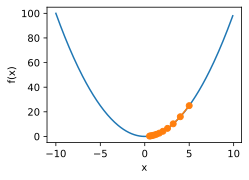

In [ ]:
res_11 = gradient_descent(5, 10, 0.1)
show_trace(res_11)

**7.2.2 学习率 learning rate**

上述梯度下降算法中的正数$\eta$通常叫作学习率。这是一个超参数(hyperparameter)，需要人工设定。如果使用过小的学习率，会导致$x$更新缓慢从而需要更多的迭代才能得到较好的解。

下面展示使用学习率$\eta=0.05$时自变量$x$的迭代轨迹。可见，同样迭代10次后，当学习率过小时，最终$x$的值依然与最优解存在较大偏差。

In [ ]:
#初始值为10，迭代次数为10，学习率为0.05
res_21 = gradient_descent(10, 10, 0.05) #此时的learning rate=0.05

epoch 10, x: 3.4867844009999995


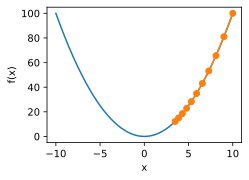

In [ ]:
#lr = 0.05的运动轨迹
show_trace(res_21)

In [ ]:
#初始值为10，迭代次数为50，学习率为0.05
res_22 = gradient_descent(10, 50, 0.05)

epoch 10, x: 0.051537752073201076


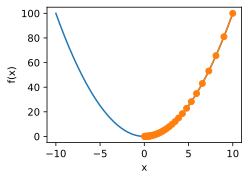

In [ ]:
show_trace(res_22) #增加迭代次数才可以下降到理想状态

如果使用过大的学习率，$\left|\eta f'(x)\right|$可能会过大从而使前面提到的一阶泰勒展开公式不再成立：这时我们无法保证迭代$x$会降低$f(x)$的值。

举个例子，当设学习率$\eta=1.1$时，可以看到$x$不断越过（overshoot）最优解$x=0$并逐渐发散。

In [ ]:
#初始值为10，迭代次数为10，lr=1.1
res_3 = gradient_descent(10, 10, 1.1)  #此时的learning rate=1.1

epoch 10, x: 61.917364224000096


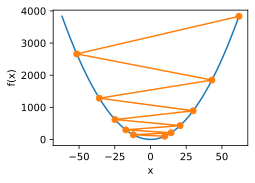

In [ ]:
#lr = 1.1时的运动轨迹
show_trace(res_3)

**7.2.3 多维梯度下降 multidimensional gradient descent**

在了解了一维梯度下降之后，我们再考虑一种更广义的情况：目标函数的输入为向量，输出为标量。假设目标函数$f: \mathbb{R}^d \rightarrow \mathbb{R}$的输入是一个$d$维向量$\boldsymbol{x} = [x_1, x_2, \ldots, x_d]^\top$。目标函数$f(\boldsymbol{x})$有关$\boldsymbol{x}$的梯度是一个由$d$个偏导数组成的向量：

$$\nabla_{\boldsymbol{x}} f(\boldsymbol{x}) = \bigg[\frac{\partial f(\boldsymbol{x})}{\partial x_1}, \frac{\partial f(\boldsymbol{x})}{\partial x_2}, \ldots, \frac{\partial f(\boldsymbol{x})}{\partial x_d}\bigg]^\top.$$


为表示简洁，我们用$\nabla f(\boldsymbol{x})$代替$\nabla_{\boldsymbol{x}} f(\boldsymbol{x})$。梯度中每个偏导数元素$\partial f(\boldsymbol{x})/\partial x_i$代表着$f$在$\boldsymbol{x}$有关输入$x_i$的变化率。为了测量$f$沿着单位向量$\boldsymbol{u}$（即$\|\boldsymbol{u}\|=1$）方向上的变化率，在多元微积分中，我们定义$f$在$\boldsymbol{x}$上沿着$\boldsymbol{u}$方向的方向导数为

$$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x}) = \lim_{h \rightarrow 0}  \frac{f(\boldsymbol{x} + h \boldsymbol{u}) - f(\boldsymbol{x})}{h}.$$

依据方向导数性质[1，14.6节定理三]，以上方向导数可以改写为

$$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x}) = \nabla f(\boldsymbol{x}) \cdot \boldsymbol{u}.$$

方向导数$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x})$给出了$f$在$\boldsymbol{x}$上沿着所有可能方向的变化率。为了最小化$f$，我们希望找到$f$能被降低最快的方向。因此，我们可以通过单位向量$\boldsymbol{u}$来最小化方向导数$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x})$。

由于$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x}) = \|\nabla f(\boldsymbol{x})\| \cdot \|\boldsymbol{u}\|  \cdot \text{cos} (\theta) = \|\nabla f(\boldsymbol{x})\|  \cdot \text{cos} (\theta)$，
其中$\theta$为梯度$\nabla f(\boldsymbol{x})$和单位向量$\boldsymbol{u}$之间的夹角，当$\theta = \pi$时，$\text{cos}(\theta)$取得最小值$-1$。因此，当$\boldsymbol{u}$在梯度方向$\nabla f(\boldsymbol{x})$的相反方向时，方向导数$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x})$被最小化。因此，我们可能通过梯度下降算法来不断降低目标函数$f$的值：

$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f(\boldsymbol{x}).$$

同样，其中$\eta$（取正数）称作学习率。

下面我们构造一个输入为二维向量$\boldsymbol{x} = [x_1, x_2]^\top$和输出为标量的目标函数$f(\boldsymbol{x})=x_1^2+2x_2^2$。那么，梯度$\nabla f(\boldsymbol{x}) = [2x_1, 4x_2]^\top$。我们将观察梯度下降从初始位置$[-5,-2]$开始对自变量$\boldsymbol{x}$的迭代轨迹。我们先定义两个辅助函数，第一个函数使用给定的自变量更新函数，从初始位置$[-5,-2]$开始迭代自变量$\boldsymbol{x}$共20次，第二个函数对自变量$\boldsymbol{x}$的迭代轨迹进行可视化。

In [ ]:
#自变量更新函数，初始位置[-5,-2]，迭代次数20
def train_2d(epochs, trainer):
  '''
  train_2d:二维函数迭代更新函数
  epochs:迭代次数
  trainer:自变量迭代公式函数
  '''
  x1, x2, s1, s2 = -5, -2, 0, 0 #初始值x1,x2; s1,s2是自变量状态（后续会用到）
  results = [(x1, x2)] #存放自变量迭代结构
  for i in range(epochs):
    x1, x2, s1, s2 = trainer(x1, x2, s1, s2) 
    results.append((x1, x2))
  print('epoch %d, x1 %f, x2 %f' % (i+1, x1, x2))
  return results

#迭代轨迹函数
def show_trace_2d(f, results):  # 本函数将保存在d2lzh_pytorch包中方便以后使用
  '''
  show_trace_2d:迭代轨迹展示函数
  f:objective function
  results:自变量迭代更新结果
  '''
  d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
  x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
  d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
  d2l.plt.xlabel('x1')
  d2l.plt.ylabel('x2')

然后，观察学习率为$0.1$时自变量的迭代轨迹。使用梯度下降对自变量$\boldsymbol{x}$迭代20次后，可见最终$\boldsymbol{x}$的值较接近最优解$[0,0]$。

epoch 10, x1 -0.536871, x2 -0.012093


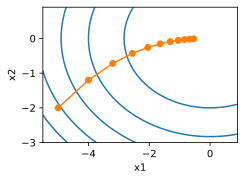

In [ ]:
lr = 0.1 #learning rate

#objective function
def f_2d(x1, x2):
  return x1 ** 2 + 2 * x2 ** 2

#自变量迭代公式
def gradient_descent_2d(x1, x2, s1, s2):
  return(x1 - lr * 2 * x1, x2 - lr * 4 * x2, 0, 0)

show_trace_2d(f_2d, train_2d(10, gradient_descent_2d))

epoch 20, x1 -0.057646, x2 -0.000073


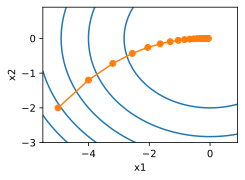

In [ ]:
#lr=0.1,epochs = 20
lr = 0.1
show_trace_2d(f_2d, train_2d(20, gradient_descent_2d))

epoch 10, x1 -1.743392, x2 -0.214748


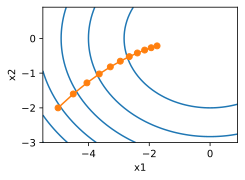

In [ ]:
#若lr=0.05时
lr = 0.05
show_trace_2d(f_2d, train_2d(10, gradient_descent_2d))

epoch 20, x1 -0.607883, x2 -0.023058


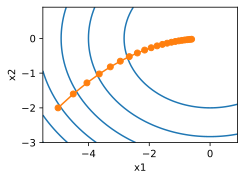

In [ ]:
#当lr变小时，迭代次数可能需要增加才能得到理想值
lr = 0.05
show_trace_2d(f_2d, train_2d(20, gradient_descent_2d))

**7.2.4 随机梯度下降 stochastic gradient descent**

在深度学习里，目标函数通常是训练数据集中有关各个样本的损失函数的平均。设$f_i(\boldsymbol{x})$是有关索引为$i$的训练数据样本的损失函数，$n$是训练数据样本数，$\boldsymbol{x}$是模型的参数向量，那么目标函数定义为

$$f(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n f_i(\boldsymbol{x}).$$

目标函数在$\boldsymbol{x}$处的梯度计算为

$$\nabla f(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\boldsymbol{x}).$$

如果使用梯度下降，每次自变量迭代的计算开销为$\mathcal{O}(n)$，它随着$n$线性增长。因此，当训练数据样本数很大时，梯度下降每次迭代的计算开销很高。

随机梯度下降（stochastic gradient descent，SGD）减少了每次迭代的计算开销。在随机梯度下降的每次迭代中，我们随机均匀采样的一个样本索引$i\in\{1,\ldots,n\}$，并计算梯度$\nabla f_i(\boldsymbol{x})$来迭代$\boldsymbol{x}$：

$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f_i(\boldsymbol{x}).$$

这里$\eta$同样是学习率。可以看到每次迭代的计算开销从梯度下降的$\mathcal{O}(n)$降到了常数$\mathcal{O}(1)$。值得强调的是，随机梯度$\nabla f_i(\boldsymbol{x})$是对梯度$\nabla f(\boldsymbol{x})$的无偏估计：

$$E_i \nabla f_i(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\boldsymbol{x}) = \nabla f(\boldsymbol{x}).$$

这意味着，平均来说，随机梯度是对梯度的一个良好的估计。

下面我们通过在梯度中添加均值为0的随机噪声来模拟随机梯度下降，以此来比较它与梯度下降的区别。

可以看到，随机梯度下降中自变量的迭代轨迹相对于梯度下降中的来说更为曲折。这是由于实验所添加的噪声使模拟的随机梯度的准确度下降。在实际中，这些噪声通常指训练数据集中的无意义的干扰。

epoch 20, x1 0.073528, x2 0.070783


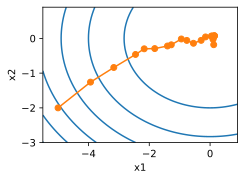

In [ ]:
#随机梯度下降SGD
def sgd_2d(x1, x2, s1, s2):
  return(
      x1 - lr * (2 * x1 + np.random.normal(0.1)),
      x2 - lr * (4 * x2 + np.random.normal(0.1)),
      0, 0
  )

show_trace_2d(f_2d, train_2d(20, sgd_2d))

**7.3 小批量随机梯度下降**

在每一次迭代中，梯度下降使用整个训练数据集来计算梯度，因此它有时也被称为批量梯度下降（batch gradient descent）。而随机梯度下降在每次迭代中只随机采样一个样本来计算梯度。正如我们在前几章中所看到的，我们还可以在每轮迭代中随机均匀采样多个样本来组成一个小批量，然后使用这个小批量来计算梯度。下面就来描述小批量随机梯度下降。


设目标函数$f(\boldsymbol{x}): \mathbb{R}^d \rightarrow \mathbb{R}$。在迭代开始前的时间步设为0。该时间步的自变量记为$\boldsymbol{x}_0\in \mathbb{R}^d$，通常由随机初始化得到。在接下来的每一个时间步$t>0$中，小批量随机梯度下降随机均匀采样一个由训练数据样本索引组成的小批量$\mathcal{B}_t$。我们可以通过重复采样（sampling with replacement）或者不重复采样（sampling without replacement）得到一个小批量中的各个样本。前者允许同一个小批量中出现重复的样本，后者则不允许如此，且更常见。对于这两者间的任一种方式，都可以使用
$$\boldsymbol{g}_t \leftarrow \nabla f_{\mathcal{B}_t}(\boldsymbol{x}_{t-1}) = \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t}\nabla f_i(\boldsymbol{x}_{t-1})$$
来计算时间步$t$的小批量$\mathcal{B}_t$上目标函数位于$\boldsymbol{x}_{t-1}$处的梯度$\boldsymbol{g}_t$。这里$|\mathcal{B}|$代表批量大小，即小批量中样本的个数，是一个超参数。同随机梯度一样，重复采样所得的小批量随机梯度$\boldsymbol{g}_t$也是对梯度$\nabla f(\boldsymbol{x}_{t-1})$的无偏估计。给定学习率$\eta_t$（取正数），小批量随机梯度下降对自变量的迭代如下：

$$\boldsymbol{x}_t \leftarrow \boldsymbol{x}_{t-1} - \eta_t \boldsymbol{g}_t.$$

基于随机采样得到的梯度的方差在迭代过程中无法减小，因此在实际中，（小批量）随机梯度下降的学习率可以在迭代过程中自我衰减，例如$\eta_t=\eta t^\alpha$（通常$\alpha=-1$或者$-0.5$）、$\eta_t = \eta \alpha^t$（如$\alpha=0.95$）或者每迭代若干次后将学习率衰减一次。如此一来，学习率和（小批量）随机梯度乘积的方差会减小。而梯度下降在迭代过程中一直使用目标函数的真实梯度，无须自我衰减学习率。


小批量随机梯度下降中每次迭代的计算开销为$\mathcal{O}(|\mathcal{B}|)$。当批量大小为1时，该算法即为随机梯度下降；当批量大小等于训练数据样本数时，该算法即为梯度下降。当批量较小时，每次迭代中使用的样本少，这会导致并行处理和内存使用效率变低。这使得在计算同样数目样本的情况下比使用更大批量时所花时间更多。当批量较大时，每个小批量梯度里可能含有更多的冗余信息。为了得到较好的解，批量较大时比批量较小时需要计算的样本数目可能更多，例如增大迭代周期数。

**7.3.1 读取数据**

本章里我们将使用一个来自NASA的测试不同飞机机翼噪音的数据集来比较各个优化算法 [1]。我们使用该数据集的前1,500个样本和5个特征，并使用标准化对数据进行预处理。

读取NASA测试不同飞机机翼噪音的数据集，比较优化算法
读取数据集前1500个样本，5个特征

In [ ]:
#导入包或模块
%matplotlib inline
import numpy as np
import pandas as pd
import time
import torch
from torch import nn, optim
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

In [ ]:
#读取数据测试
data_dir = "/content/drive/MyDrive/Colab Notebooks/data set/NASA_airfoil_self_noise.csv" #csv文件
data = pd.read_csv(data_dir)
type(data) #data是DataFrame数据类型
data_1 = (data - data.mean(axis=0)) / data.std(axis=0) #数据标准化
type(data_1)
data_np = data_1.values #DataFrame -> numpy数组
type(data_np)
features = data_np[:1500, :-1] #特征值
labels = data_np[:1500, -1] #标签

In [ ]:
#读取数据，读取上传数据
data_dir = "/content/drive/MyDrive/Colab Notebooks/data set/NASA_airfoil_self_noise.csv"

def get_data_ch7():  # 本函数已保存在d2lzh_pytorch包中方便以后使用
  #data = np.genfromtxt('../../data/airfoil_self_noise.dat', delimiter='\t')
  data = pd.read_csv(data_dir)
  data = (data - data.mean(axis=0)) / data.std(axis=0) #数据处理
  data = data.values
  return torch.tensor(data[:1500, :-1], dtype=torch.float32), \
  torch.tensor(data[:1500, -1], dtype=torch.float32) # 前1500个样本(每个样本5个特征)

In [ ]:
features, labels = get_data_ch7()
print('特征值：', features)
print('标签：', labels)
print('features.shape:', features.shape)
print('labels.shape:', labels.shape)

特征值： tensor([[-0.6618, -1.1460,  1.7987,  1.3125, -0.6446],
        [-0.5984, -1.1460,  1.7987,  1.3125, -0.6446],
        [-0.5191, -1.1460,  1.7987,  1.3125, -0.6446],
        ...,
        [-0.2812,  1.4899, -0.3736, -0.7231,  3.1717],
        [-0.1226,  1.4899, -0.3736, -0.7231,  3.1717],
        [ 0.0836,  1.4899, -0.3736, -0.7231,  3.1717]])
标签： tensor([ 0.1979,  0.0529,  0.1616,  ..., -2.0210, -2.1123, -2.2587])
features.shape: torch.Size([1500, 5])
labels.shape: torch.Size([1500])


**7.3.2 从零开始实现**

3.2节（线性回归的从零开始实现）中已经实现过小批量随机梯度下降算法。我们在这里将它的输入参数变得更加通用，主要是为了方便本章后面介绍的其他优化算法也可以使用同样的输入。具体来说，我们添加了一个状态输入states并将超参数放在字典hyperparams里。此外，我们将在训练函数里对各个小批量样本的损失求平均，因此优化算法里的梯度不需要除以批量大小。



In [ ]:
#sgd函数，随机梯度下降
def sgd(params, states, hyperparams):
  '''
  sgd函数：随机梯度下降函数
  params: Model parameter
  states: 输入状态
  hyperparams: 超参数，自己定义，包含lr(learning rate 学习率)
  '''
  for p in params:
    p.data -= hyperparams['lr'] * p.grad.data

下面实现一个通用的训练函数，以方便本章后面介绍的其他优化算法使用。它初始化一个线性回归模型，然后可以使用小批量随机梯度下降以及后续小节介绍的其他算法来训练模型。

In [ ]:
def train_ch7(optimizer_fn, states, hyperparams, features, labels, batch_size=10, num_epochs=2):
  '''
  optimizer_fn: 优化函数, 
  states： 输入状态， 
  hyperparams：超参数字典, 
  features：特征值, 
  labels：标签, 
  batch_size=10：小批量大小，默认小批量大小为10
  num_epochs=2：迭代次数，默认迭代2次
  '''
  #初始化模型, 线性回归模型，损失函数：方差
  net, loss = d2l.linreg, d2l.squared_loss 
  #weight 权重w
  w = torch.nn.Parameter(torch.tensor(np.random.normal(0, 0.01, size=(features.shape[1],1)), dtype=torch.float32), requires_grad=True)
  #bias 偏差值b
  b = torch.nn.Parameter(torch.zeros(1, dtype=torch.float32), requires_grad=True)
  #Loss Function：均方差
  def eval_loss():
    return loss(net(features, w, b), labels).mean().item()
  #损失值
  ls = [eval_loss()]
  #每组小批量数据组集（小批量大小，特征值，标签）
  data_iter = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(features, labels), batch_size, shuffle=True)

  for _ in range(num_epochs):
    start = time.time() #迭代开始时间步
    for batch_i, (X, y) in enumerate(data_iter):
      l = loss(net(X, w, b), y).mean() #平均损失

      #梯度清零
      if w.grad is not None:
        w.grad.data.zero_()
        b.grad.data.zero_()

      l.backward() #反向计算
      optimizer_fn([w, b], states, hyperparams) #迭代模型参数
      if(batch_i + 1) * batch_size % 100 == 0:
        ls.append(eval_loss()) #每100个样本记录当下的训练误差
  #打印结果
  print('loss: %f, %f sec per epoch:' % (ls[-1], time.time() - start))
  #画图
  d2l.set_figsize()
  d2l.plt.plot(np.linspace(0, num_epochs, len(ls)), ls)
  d2l.plt.xlabel('epoch')
  d2l.plt.ylabel('loss')

当批量大小为样本总数1,500时，优化使用的是梯度下降。梯度下降的1个迭代周期对模型参数只迭代1次。可以看到6次迭代后目标函数值（训练损失）的下降趋向了平稳。

loss: 0.244482, 0.007914 sec per epoch:


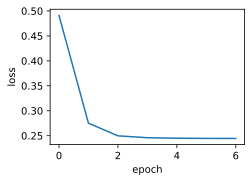

In [ ]:
def train_sgd(lr, batch_size, num_epochs=2):
  train_ch7(sgd, None, {'lr':lr}, features, labels, batch_size, num_epochs)

#learning rate = 1, batch_size = 1500（梯度下降，计算代价O(1500)), 迭代次数为6次，此时为随机梯度下降
train_sgd(1, 1500, 6) #默认迭代两次, 设置迭代6次，趋势趋于平稳

当批量大小为1时，优化使用的是随机梯度下降。为了简化实现，有关（小批量）随机梯度下降的实验中，我们未对学习率进行自我衰减，而是直接采用较小的常数学习率。随机梯度下降中，每处理一个样本会更新一次自变量（模型参数），一个迭代周期里会对自变量进行1,500次更新。可以看到，目标函数值的下降在1个迭代周期后就变得较为平缓。

loss: 0.244439, 0.409775 sec per epoch:


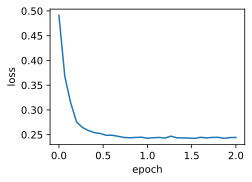

In [ ]:
#learning rate：0.005，batch_size为1(随机梯度下降，计算代价O（1）)
train_sgd(0.005, 1)

当批量大小为10时，优化使用的是小批量随机梯度下降。它在每个迭代周期的耗时介于梯度下降和随机梯度下降的耗时之间。

loss: 0.244919, 0.046878 sec per epoch:


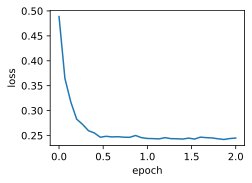

In [ ]:
#learning rate:0.05, batch_size=10(小批量随机梯度下降，计算代价O（10）)
train_sgd(0.05, 10)

**7.3.3 简洁实现**

在PyTorch里可以通过创建optimizer实例来调用优化算法。这能让实现更简洁。下面实现一个通用的训练函数，它通过优化算法的函数optimizer_fn和超参数optimizer_hyperparams来创建optimizer实例。

In [ ]:
def train_pytorch_ch7(optimizer_fn, optimizer_hyperparams, features, labels, batch_size=10, num_epochs=2):
  '''
  train_pytorch_ch7:梯度下降简洁实现
  optimizer_fn:优化函数
  optimizer_hyperparams:优化函数的超参
  features:特征值
  labels:标签
  batch_size:批量大小，默认值10
  num_epochs:迭代次数，默认2
  '''
  # 初始化模型
  net = nn.Sequential(nn.Linear(features.shape[-1], 1)) #训练模型线性回归
  loss = nn.MSELoss() #损失函数：均方差
  optimizer = optimizer_fn(net.parameters(), **optimizer_hyperparams) #优化函数

  def eval_loss():
      return loss(net(features).view(-1), labels).item() / 2

  ls = [eval_loss()]
  data_iter = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(features, labels), batch_size, shuffle=True)

  for _ in range(num_epochs):
    start = time.time()
    for batch_i, (X, y) in enumerate(data_iter):
      # 除以2是为了和train_ch7保持一致, 因为squared_loss中除了2
      l = loss(net(X).view(-1), y) / 2 

      optimizer.zero_grad()
      l.backward()
      optimizer.step()
      if (batch_i + 1) * batch_size % 100 == 0:
        ls.append(eval_loss())
  # 打印结果和作图
  print('loss: %f, %f sec per epoch' % (ls[-1], time.time() - start))
  d2l.set_figsize()
  d2l.plt.plot(np.linspace(0, num_epochs, len(ls)), ls)
  d2l.plt.xlabel('epoch')
  d2l.plt.ylabel('loss')

loss: 0.297226, 0.008769 sec per epoch


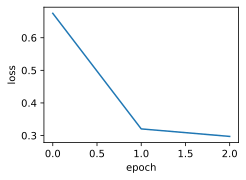

In [ ]:
#learning rate = 1, batch_size = 1500（梯度下降，计算代价O(1500))，此时为随机梯度下降
train_pytorch_ch7(optim.SGD, {'lr':1}, features, labels, 1500) #默认迭代2次

loss: 0.244867, 0.514345 sec per epoch


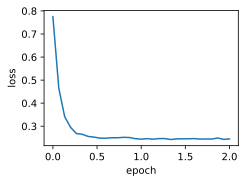

In [ ]:
#learning rate：0.005，batch_size为1(随机梯度下降，计算代价O（1）)
train_pytorch_ch7(optim.SGD, {'lr': 0.005}, features, labels, 1)

loss: 0.245453, 0.060055 sec per epoch


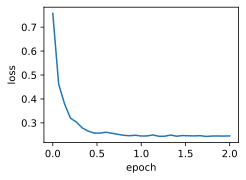

In [ ]:
#learning rate:0.05, batch_size=10(小批量随机梯度下降，计算代价O（10）)
train_pytorch_ch7(optim.SGD, {"lr": 0.05}, features, labels, 10)

**小结**

* 小批量随机梯度每次随机均匀采样一个小批量的训练样本来计算梯度。
* 在实际中，（小批量）随机梯度下降的学习率可以在迭代过程中自我衰减。
* 通常，小批量随机梯度在每个迭代周期的耗时介于梯度下降和随机梯度下降的耗时之间。

**7.4 动量法 momentum**

在7.2节（梯度下降和随机梯度下降）中我们提到，目标函数有关自变量的梯度代表了目标函数在自变量当前位置下降最快的方向。因此，梯度下降也叫作最陡下降（steepest descent）。在每次迭代中，梯度下降根据自变量当前位置，沿着当前位置的梯度更新自变量。然而，如果自变量的迭代方向仅仅取决于自变量当前位置，这可能会带来一些问题

**7.4.1 梯度下降问题**

让我们考虑一个输入和输出分别为二维向量$\boldsymbol{x} = [x_1, x_2]^\top$和标量的目标函数$f(\boldsymbol{x})=0.1x_1^2+2x_2^2$。与7.2节中不同，这里将$x_1^2$系数从$1$减小到了$0.1$。下面实现基于这个目标函数的梯度下降，并演示使用学习率为$0.4$时自变量的迭代轨迹。

In [ ]:
#导入包或模型
%matplotlib inline
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l
import torch

In [ ]:
lr = 0.4 #learning rate：0.4

#objective function
def f_2d(x1, x2):
  return 0.1 * x1 ** 2 + 2 * x2 ** 2

#gradient descent
def gd_2d(x1, x2, s1, s2):
  return (x1 - lr * 0.2 * x1, x2 - lr * 4 * x2, 0, 0)

#momentum
def momentum_2d(x1, x2, v1, v2):
  v1 = gamma * v1 + lr * 0.2 * x1
  v2 = gamma * v2 + lr * 4 * x2
  return x1 - v1, x2 -v2, v1, v2

epoch 20, x1 -0.943467, x2 -0.000073


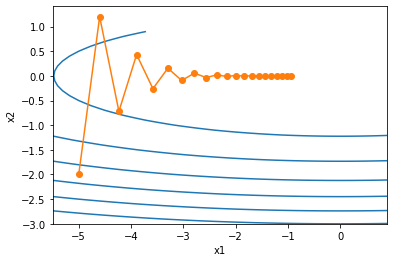

In [ ]:
#打印结果并画图
lr = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d)) #使用梯度下降

epoch 20, x1 -0.062843, x2 0.001202


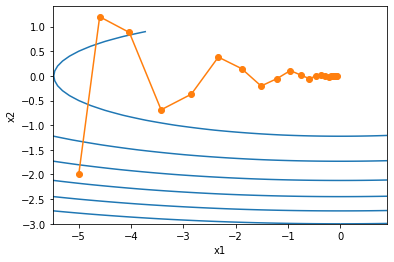

In [ ]:
lr = 0.4
gamma = 0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d)) #使用动力法

可以看到，同一位置上，目标函数在竖直方向（$x_2$轴方向）比在水平方向（$x_1$轴方向）的斜率的绝对值更大。因此，给定学习率，梯度下降迭代自变量时会使自变量在竖直方向比在水平方向移动幅度更大。那么，我们需要一个较小的学习率从而避免自变量在竖直方向上越过目标函数最优解。然而，这会造成自变量在水平方向上朝最优解移动变慢。

epoch 20, x1 -4.257978, x2 -0.061181


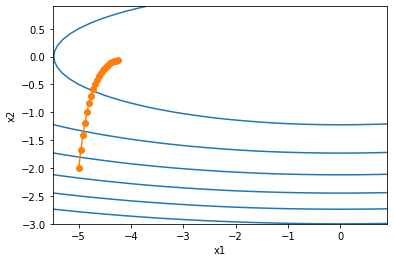

In [ ]:
#将learning rate变小
lr = 0.04

#打印并画图
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

从上图可以将学习率缩小10倍，竖直方向上的$x_2$梯度变化减小，但是水平方向$x_1$的梯度变化朝最优解移动变慢

下面我们试着将学习率调得稍大一点，此时自变量在竖直方向不断越过最优解并逐渐发散。

epoch 20, x1 -0.387814, x2 -1673.365109


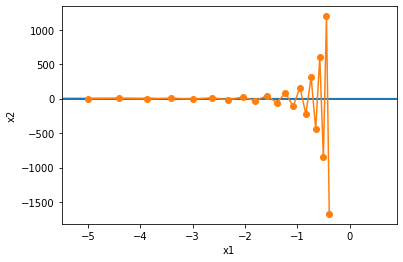

In [ ]:
lr = 0.6 #learning rate=0.6

#打印并画图
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

可以看出比较，自变量在竖直方向不再发散，且可以逼近最优值

epoch 20, x1 0.007188, x2 0.002553


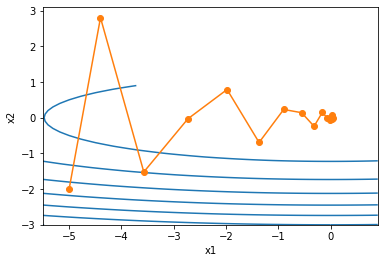

In [ ]:
#使用momentum
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d)) 

**7.4.2 动量法 Momentum**

动量法的提出是为了解决梯度下降的上述问题。由于小批量随机梯度下降比梯度下降更为广义，本章后续讨论将沿用7.3节（小批量随机梯度下降）中时间步$t$的小批量随机梯度$\boldsymbol{g}_t$的定义。设时间步$t$的自变量为$\boldsymbol{x}_t$，学习率为$\eta_t$。
在时间步$0$，动量法创建速度变量$\boldsymbol{v}_0$，并将其元素初始化成0。在时间步$t>0$，动量法对每次迭代的步骤做如下修改：
$$\boldsymbol{g}_t \leftarrow \nabla f_{\mathcal{B}_t}(\boldsymbol{x}_{t-1}) = \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t}\nabla f_i(\boldsymbol{x}_{t-1})$$
$$\begin{aligned}
\boldsymbol{v}_t &\leftarrow \gamma \boldsymbol{v}_{t-1} + \eta_t \boldsymbol{g}_t, \\
\boldsymbol{x}_t &\leftarrow \boldsymbol{x}_{t-1} - \boldsymbol{v}_t,
\end{aligned}$$

其中，动量超参数$\gamma$满足$0 \leq \gamma < 1$。当$\gamma=0$时，动量法等价于小批量随机梯度下降。



在解释动量法的数学原理前，让我们先从实验中观察梯度下降在使用动量法后的迭代轨迹。

In [ ]:
#使用动量法momentum的迭代公式
def momentum_2d(x1, x2, v1, v2):
  #gamma: hyperparameter
  v1 = gamma * v1 + lr * 0.2 * x1
  v2 = gamma * v2 + lr * 4 * x2
  return  x1 - v1, x2 - v2, v1, v2


epoch 20, x1 -0.062843, x2 0.001202


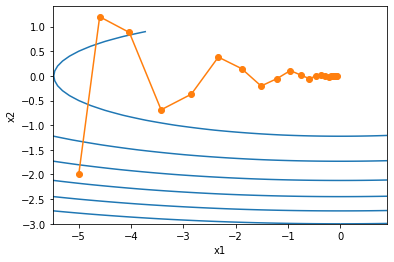

In [ ]:
#learning rate=0.4, gamma=0.5
lr = 0.4
gamma = 0.5

d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

可以看到使用较小的学习率$\eta=0.4$和动量超参数$\gamma=0.5$时，动量法在竖直方向上的移动更加平滑，且在水平方向上更快逼近最优解。下面使用较大的学习率$\eta=0.6$，此时自变量也不再发散。

epoch 20, x1 -3.664247, x2 -0.002231


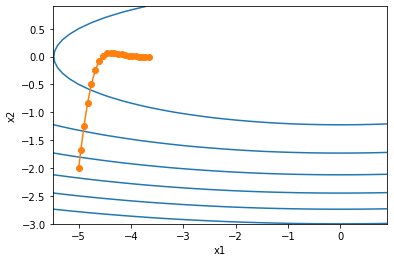

In [ ]:
#减小学习率
lr = 0.04
gamma  = 0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

epoch 20, x1 0.007188, x2 0.002553


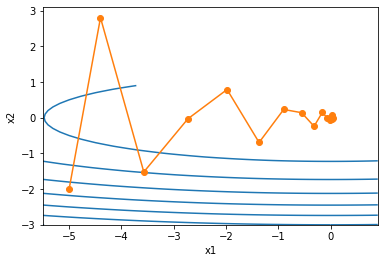

In [ ]:
#增加学习率
lr = 0.6
gamma = 0.5

d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

**7.4.2.1 指数加权移动平均**

为了从数学上理解动量法，让我们先解释一下指数加权移动平均（exponentially weighted moving average）。给定超参数$0 \leq \gamma < 1$，当前时间步$t$的变量$y_t$是上一时间步$t-1$的变量$y_{t-1}$和当前时间步另一变量$x_t$的线性组合：

$$y_t = \gamma y_{t-1} + (1-\gamma) x_t.$$

$$y_{t-1}$$是上一时刻（t-1）的平均预测值，$$x_t$$是t时刻真实值

我们可以对$y_t$展开：
$$\begin{aligned}
y_t  &= (1-\gamma) x_t + \gamma y_{t-1}\\
         &= (1-\gamma)x_t + (1-\gamma) \cdot \gamma x_{t-1} + \gamma^2y_{t-2}\\
         &= (1-\gamma)x_t + (1-\gamma) \cdot \gamma x_{t-1} + (1-\gamma) \cdot \gamma^2x_{t-2} + \gamma^3y_{t-3}\\
         &\ldots
\end{aligned}$$

令$n = 1/(1-\gamma)$，那么 $\left(1-1/n\right)^n = \gamma^{1/(1-\gamma)}$。因为

$$ \lim_{n \rightarrow \infty}  \left(1-\frac{1}{n}\right)^n = \exp(-1) \approx 0.3679,$$

所以当$\gamma \rightarrow 1$时，$\gamma^{1/(1-\gamma)}=\exp(-1)$，如$0.95^{20} \approx \exp(-1)$。如果把$\exp(-1)$当作一个比较小的数，我们可以在近似中忽略所有含$\gamma^{1/(1-\gamma)}$和比$\gamma^{1/(1-\gamma)}$更高阶的系数的项。例如，当$\gamma=0.95$时，

$$y_t \approx 0.05 \sum_{i=0}^{19} 0.95^i x_{t-i}.$$

因此，在实际中，我们常常将$y_t$看作是对最近$1/(1-\gamma)$个时间步的$x_t$值的加权平均。例如，当$\gamma = 0.95$时，$y_t$可以被看作对最近20个时间步的$x_t$值的加权平均；当$\gamma = 0.9$时，$y_t$可以看作是对最近10个时间步的$x_t$值的加权平均。而且，离当前时间步$t$越近的$x_t$值获得的权重越大（越接近1）。

**7.4.2.2 由指数加权移动平均理解动量法**

现在，我们对动量法的速度变量做变形：

$$\boldsymbol{v}_t \leftarrow \gamma \boldsymbol{v}_{t-1} + (1 - \gamma) \left(\frac{\eta_t}{1 - \gamma} \boldsymbol{g}_t\right). $$

由指数加权移动平均的形式可得，速度变量$\boldsymbol{v}_t$实际上对序列$\{\eta_{t-i}\boldsymbol{g}_{t-i} /(1-\gamma):i=0,\ldots,1/(1-\gamma)-1\}$做了指数加权移动平均。换句话说，相比于小批量随机梯度下降，**动量法在每个时间步的自变量更新量近似于将最近$1/(1-\gamma)$个时间步的普通更新量（即学习率乘以梯度）做了指数加权移动平均后再除以$1-\gamma$**。所以，在动量法中，自变量在各个方向上的移动幅度不仅取决当前梯度，还取决于过去的各个梯度在各个方向上是否一致。在本节之前示例的优化问题中，所有梯度在水平方向上为正（向右），而在竖直方向上时正（向上）时负（向下）。这样，我们就可以使用较大的学习率，从而使自变量向最优解更快移动。

**7.4.3 从零开始实现**

相对于小批量随机梯度下降，动量法需要对每一个自变量维护一个同它一样形状的速度变量，且超参数里多了动量超参数。实现中，我们将速度变量用更广义的状态变量states表示。

In [ ]:
#读取数据，读取上传飞机噪音数据
data_dir = "/content/drive/MyDrive/Colab Notebooks/data set/NASA_airfoil_self_noise.csv"

def get_data_ch7():  # 本函数已保存在d2lzh_pytorch包中方便以后使用
  #data = np.genfromtxt('../../data/airfoil_self_noise.dat', delimiter='\t')
  data = pd.read_csv(data_dir)
  data = (data - data.mean(axis=0)) / data.std(axis=0) #数据处理
  data = data.values
  return torch.tensor(data[:1500, :-1], dtype=torch.float32), \
  torch.tensor(data[:1500, -1], dtype=torch.float32) # 前1500个样本(每个样本5个特征)

In [ ]:
#指数加权移动平均
features, labels = get_data_ch7() #特征值和标签

#初始化动量法的速度变量
def init_momentum_states():
  v_w = torch.zeros((features.shape[1],1), dtype=torch.float32)
  v_b = torch.zeros(1, dtype=torch.float32)
  return (v_w, v_b)

#随机梯度下降下的动量法
def sgd_momentum(params, states, hyperparams):
  for p, v in zip(params, states):
    v.data = hyperparams['momentum'] * v.data + hyperparams['lr'] * p.grad.data
    p.data -= v.data

我们先将动量超参数momentum设0.5，这时可以看成是特殊的小批量随机梯度下降：其小批量随机梯度为最近2个时间步的2倍小批量梯度的加权平均。

注：个人认为这里不应该是“加权平均”而应该是“加权和”，因为根据7.4.2.2节分析，加权平均最后除以了$1-\gamma$，所以就相当于没有进行平均。

loss: 0.241939, 0.062349 sec per epoch


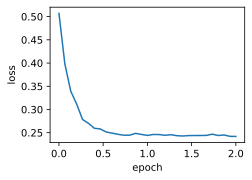

In [ ]:
d2l.train_ch7(sgd_momentum, init_momentum_states(), {'lr':0.02, 'momentum':0.5}, features, labels)

将动量超参数momentum增大到0.9，这时依然可以看成是特殊的小批量随机梯度下降：其小批量随机梯度为最近10个时间步的10倍小批量梯度的加权平均。我们先保持学习率0.02不变。

应该是“加权和”而不是“加权平均”

loss: 0.251654, 0.051503 sec per epoch


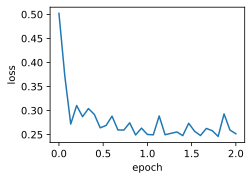

In [ ]:
d2l.train_ch7(sgd_momentum, init_momentum_states(), {'lr':0.02, 'momentum':0.9}, features, labels)

可见目标函数值在后期迭代过程中的变化不够平滑。直觉上，10倍小批量梯度比2倍小批量梯度大了5倍，我们可以试着将学习率减小到原来的1/5，即lr=0.004。此时目标函数值在下降了一段时间后变化更加平滑。

loss: 0.242878, 0.051514 sec per epoch


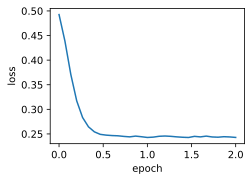

In [ ]:
d2l.train_ch7(sgd_momentum, init_momentum_states(), {'lr':0.004, 'momentum':0.9}, features, labels)

**7.4.4 简介实现**

在PyTorch中，只需要通过参数momentum来指定动量超参数即可使用动量法。

loss: 0.244362, 0.062507 sec per epoch


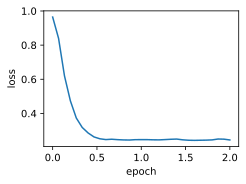

In [ ]:
d2l.train_pytorch_ch7(torch.optim.SGD, {'lr':0.004, 'momentum':0.9}, features, labels)

**7.5 AdaGrad算法**

在之前介绍过的优化算法中，目标函数自变量的每一个元素在相同时间步都使用同一个学习率来自我迭代。举个例子，假设目标函数为$f$，自变量为一个二维向量$[x_1, x_2]^\top$，该向量中每一个元素在迭代时都使用相同的学习率。例如，在学习率为$\eta$的梯度下降中，元素$x_1$和$x_2$都使用相同的学习率$\eta$来自我迭代：

$$
x_1 \leftarrow x_1 - \eta \frac{\partial{f}}{\partial{x_1}}, \quad
x_2 \leftarrow x_2 - \eta \frac{\partial{f}}{\partial{x_2}}.
$$

在7.4节（动量法）里我们看到当$x_1$和$x_2$的梯度值有较大差别时，需要选择足够小的学习率使得自变量在梯度值较大的维度上不发散。但这样会导致自变量在梯度值较小的维度上迭代过慢。动量法依赖指数加权移动平均使得自变量的更新方向更加一致，从而降低发散的可能。本节我们介绍**AdaGrad算法，它根据自变量在每个维度的梯度值的大小来调整各个维度上的学习率，从而避免统一的学习率难以适应所有维度的问题**[1]。

**7.5.1 算法**

AdaGrad算法会使用一个小批量随机梯度$\boldsymbol{g}_t$按元素平方的累加变量$\boldsymbol{s}_t$。在时间步0，AdaGrad将$\boldsymbol{s}_0$中每个元素初始化为0。在时间步$t$，首先将小批量随机梯度$\boldsymbol{g}_t$按元素平方后累加到变量$\boldsymbol{s}_t$：

$$\boldsymbol{s}_t \leftarrow \boldsymbol{s}_{t-1} + \boldsymbol{g}_t \odot \boldsymbol{g}_t,$$

其中$\odot$是按元素相乘。接着，我们将目标函数自变量中每个元素的学习率通过按元素运算重新调整一下：

$$\boldsymbol{x}_t \leftarrow \boldsymbol{x}_{t-1} - \frac{\eta}{\sqrt{\boldsymbol{s}_t + \epsilon}} \odot \boldsymbol{g}_t,$$

其中$\eta$是学习率，$\epsilon$是为了维持数值稳定性而添加的常数，如$10^{-6}$。这里开方、除法和乘法的运算都是按元素运算的。这些按元素运算使得目标函数自变量中每个元素都分别拥有自己的学习率。



**7.5.2 特点**

需要强调的是，小批量随机梯度按元素平方的累加变量$\boldsymbol{s}_t$出现在学习率的分母项中。因此，如果目标函数有关自变量中某个元素的偏导数一直都较大，那么该元素的学习率将下降较快；反之，如果目标函数有关自变量中某个元素的偏导数一直都较小，那么该元素的学习率将下降较慢。然而，由于$\boldsymbol{s}_t$一直在累加按元素平方的梯度，自变量中每个元素的学习率在迭代过程中一直在降低（或不变）。所以，**当学习率在迭代早期降得较快且当前解依然不佳时，AdaGrad算法在迭代后期由于学习率过小，可能较难找到一个有用的解**。

下面我们仍然以目标函数$f(\boldsymbol{x})=0.1x_1^2+2x_2^2$为例观察AdaGrad算法对自变量的迭代轨迹。我们实现AdaGrad算法并使用和上一节实验中相同的学习率0.4。可以看到，自变量的迭代轨迹较平滑。但由于$\boldsymbol{s}_t$的累加效果使学习率不断衰减，自变量在迭代后期的移动幅度较小。

In [ ]:
#导入包或模块
%matplotlib inline
import math
import torch
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

epoch 20, x1 -2.382563, x2 -0.158591


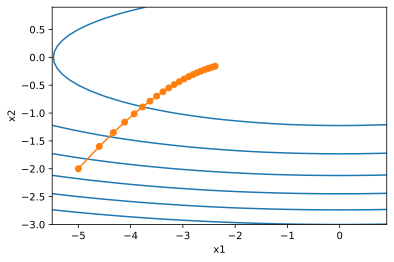

In [ ]:
#adaptive gradient 自适应梯度
def adagrad_2d(x1, x2, s1, s2):
  g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6  # 前两项为自变量梯度
  s1 += g1 ** 2
  s2 += g2 ** 2
  x1 -= lr / math.sqrt(s1 + eps) * g1
  x2 -= lr / math.sqrt(s2 + eps) * g2
  return x1, x2, s1, s2

def f_2d(x1, x2):
  return 0.1 * x1 ** 2 + 2 * x2 ** 2

lr = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 20, x1 -4.699820, x2 -1.705505


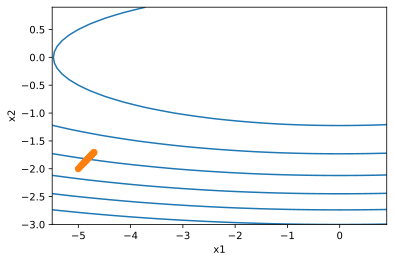

In [ ]:
#缩小学习率10倍
lr = 0.04
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 20, x1 -0.002295, x2 -0.000000


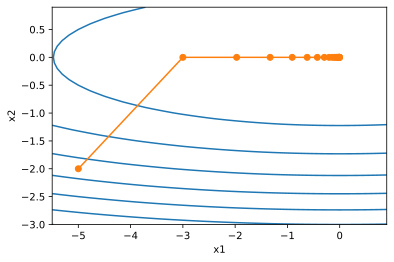

In [ ]:
#下面将学习率增大到2。可以看到自变量更为迅速地逼近了最优解。
lr = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

**7.5.3 从零开始实现**

同动量法一样，AdaGrad算法需要对每个自变量维护同它一样形状的状态变量。我们根据AdaGrad算法中的公式实现该算法。

In [ ]:
#读取数据，读取上传飞机噪音数据
data_dir = "/content/drive/MyDrive/Colab Notebooks/data set/NASA_airfoil_self_noise.csv"

def get_data_ch7():  # 本函数已保存在d2lzh_pytorch包中方便以后使用
  #data = np.genfromtxt('../../data/airfoil_self_noise.dat', delimiter='\t')
  data = pd.read_csv(data_dir)
  data = (data - data.mean(axis=0)) / data.std(axis=0) #数据处理
  data = data.values
  return torch.tensor(data[:1500, :-1], dtype=torch.float32), \
  torch.tensor(data[:1500, -1], dtype=torch.float32) # 前1500个样本(每个样本5个特征)

In [ ]:
features, labels = get_data_ch7() #特征值和标签

#初始化状态变量
def init_adagrad_states():
  s_w = torch.zeros((features.shape[1],1), dtype=torch.float32)
  s_b = torch.zeros(1, dtype=torch.float32)
  return (s_w, s_b)

#adaptive gradient function
def adagrad(params, states, hyperparams):
  eps = 1e-6 #分母s的惩罚项
  for p, s in zip(params, states):
    s.data += (p.grad.data ** 2) #s是自变量梯度平方累加
    p.data -= hyperparams['lr'] * p.grad.data / torch.sqrt(s + eps) #自变量迭代公式

与7.3节（小批量随机梯度下降）中的实验相比，这里使用更大的学习率来训练模型。

loss: 0.463206, 0.054061 sec per epoch


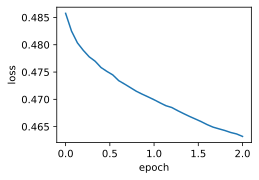

In [ ]:
#先使用较小的lr
d2l.train_ch7(adagrad, init_adagrad_states(), {'lr': 0.001}, features, labels)

可以看出，初始lr过小，在迭代过程中，自变量lr会变小（或不变）导致未迭代到自变量最优解就会结束优化，无法找到有用解，使得误差过大

loss: 0.243184, 0.054536 sec per epoch


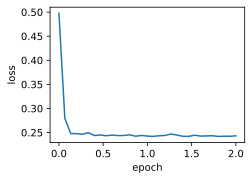

In [ ]:
#增大lr
d2l.train_ch7(adagrad, init_adagrad_states(), {'lr': 0.1}, features, labels)

误差比lr=0.001减小许多，自变量下降到最优解过程相对稳定。

loss: 0.268452, 0.060055 sec per epoch


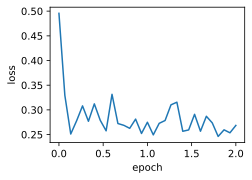

In [ ]:
#再次增加lr
d2l.train_ch7(adagrad, init_adagrad_states(), {'lr': 1}, features, labels)

当lr=1时，全局lr过大，优化不稳定，出现震荡。

loss: 0.613042, 0.061809 sec per epoch


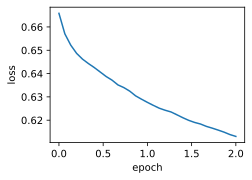

In [ ]:
#简单实现
d2l.train_pytorch_ch7(torch.optim.Adagrad, {'lr': 0.001}, features, labels)

loss: 0.242353, 0.063297 sec per epoch


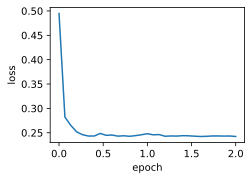

In [ ]:
#lr = 0.1
d2l.train_pytorch_ch7(torch.optim.Adagrad, {'lr':0.1}, features, labels)

loss: 0.274664, 0.062658 sec per epoch


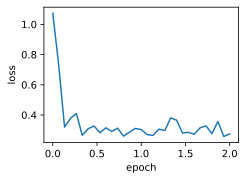

In [ ]:
#lr = 1
d2l.train_pytorch_ch7(torch.optim.Adagrad, {'lr':2}, features, labels)

**小结**

* AdaGrad算法在迭代过程中不断调整学习率，并让目标函数自变量中每个元素都分别拥有自己的学习率。
* 使用AdaGrad算法时，自变量中每个元素的学习率在迭代过程中一直在降低（或不变）。
* AdaGrad的缺点是虽然不同变量有了各自的学习率，但是初始的全局学习率还是需要手工指定。如果全局学习率过大，优化同样不稳定；而如果全局学习率过小，因为AdaGrad的特性，随着优化的进行，学习率会越来越小，很可能还没有到极值就停滞不前了。

**7.6 RMSProp算法**

我们在7.5节（AdaGrad算法）中提到，因为调整学习率时分母上的变量$\boldsymbol{s}_t$一直在累加按元素平方的小批量随机梯度，所以目标函数自变量每个元素的学习率在迭代过程中一直在降低（或不变）。因此，当学习率在迭代早期降得较快且当前解依然不佳时，AdaGrad算法在迭代后期由于学习率过小，可能较难找到一个有用的解。为了解决这一问题，RMSProp算法对AdaGrad算法做了一点小小的修改。该算法源自Coursera上的一门课程，即“机器学习的神经网络” [1]。

**7.6.1 算法**

我们在7.4节（动量法）里介绍过指数加权移动平均。不同于AdaGrad算法里状态变量$\boldsymbol{s}_t$是截至时间步$t$所有小批量随机梯度$\boldsymbol{g}_t$按元素平方和，RMSProp算法将这些梯度按元素平方做指数加权移动平均。具体来说，给定超参数$0 \leq \gamma < 1$，RMSProp算法在时间步$t>0$计算

$$\boldsymbol{s}_t \leftarrow \gamma \boldsymbol{s}_{t-1} + (1 - \gamma) \boldsymbol{g}_t \odot \boldsymbol{g}_t. $$

和AdaGrad算法一样，RMSProp算法将目标函数自变量中每个元素的学习率通过按元素运算重新调整，然后更新自变量

$$\boldsymbol{x}_t \leftarrow \boldsymbol{x}_{t-1} - \frac{\eta}{\sqrt{\boldsymbol{s}_t + \epsilon}} \odot \boldsymbol{g}_t, $$

其中$\eta$是学习率，$\epsilon$是为了维持数值稳定性而添加的常数，如$10^{-6}$。因为RMSProp算法的状态变量$\boldsymbol{s}_t$是对平方项$\boldsymbol{g}_t \odot \boldsymbol{g}_t$的指数加权移动平均，所以可以看作是最近$1/(1-\gamma)$个时间步的小批量随机梯度平方项的加权平均。如此一来，自变量每个元素的学习率在迭代过程中就不再一直降低（或不变）。

照例，让我们先观察RMSProp算法对目标函数$f(\boldsymbol{x})=0.1x_1^2+2x_2^2$中自变量的迭代轨迹。回忆在7.5节（AdaGrad算法）使用的学习率为0.4的AdaGrad算法，自变量在迭代后期的移动幅度较小。但在同样的学习率下，RMSProp算法可以更快逼近最优解。

In [ ]:
#导入包或模块
%matplotlib inline
import math
import torch
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

In [ ]:
#RMSProp
def rmsprop_2d(x1, x2, s1, s2):
  g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6 #g1,g2为梯度，eps为s的惩罚项
  s1 = gamma * s1 + (1 - gamma) * g1 ** 2 #使用指数加权移动平均法计算s
  s2 = gamma * s2 + (1 - gamma) * g2 ** 2
  x1 -= lr / math.sqrt(s1 + eps) * g1 #x1迭代公式
  x2 -= lr / math.sqrt(s2 + eps) * g2 #x2迭代公式
  return x1, x2, s1, s2

#objective function
def f_2d(x1, x2):
  return 0.1 * x1 ** 2 + 2 * x2 ** 2

epoch 20, x1 -3.900628, x2 -0.980734


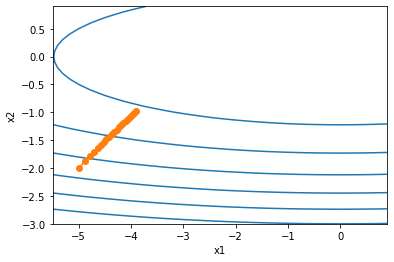

In [ ]:
#选择较小lr = 0.04
lr, gamma = 0.04, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

可以看出lr较小，并未达到最优解，但朝着最优解方向迭代

epoch 20, x1 -0.010599, x2 0.000000


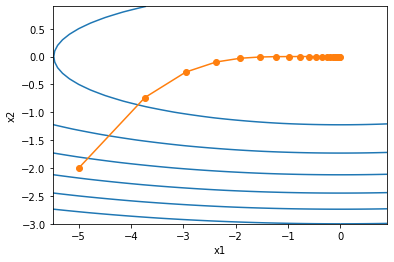

In [ ]:
lr, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

较为平滑的趋向最优解

epoch 20, x1 0.000000, x2 -0.255285


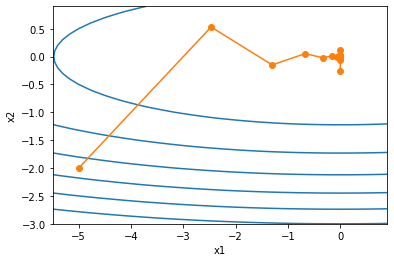

In [ ]:
#lr较大
lr, gamma = 0.8, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

当lr较大时，虽然出现震荡，但是在横、纵轴迭代趋势都相对一致并去向最有解

**7.6.1 从零开始实现**

按照RMSProp算法公式实现

In [ ]:
#读取数据
features, labels = get_data_ch7() 

In [ ]:
#初始化状态
def init_rmsprop_states():
  s_w = torch.zeros((features.shape[1],1), dtype=torch.float32)
  s_b = torch.zeros(1, dtype=torch.float32)
  return(s_w, s_b)

#RMSProp_6: eps=1e-6
def rmsprop_6(params, states, hyperparams):
  gamma, eps = hyperparams['gamma'], 1e-6
  for p, s in zip(params, states):
    s.data = gamma * s.data + (1-gamma) * (p.grad.data) ** 2 #s使用指数加权移动平均法
    p.data -= hyperparams['lr'] * p.grad.data / torch.sqrt(s + eps)

#RMSProp_8: eps = 1e-8
def rmsprop_8(params, states, hyperparams):
  gamma, eps = hyperparams['gamma'], 1e-8 #gamma，eps惩罚值
  for p, s in zip(params, states):
    s.data = gamma * s.data + (1-gamma) * (p.grad.data) ** 2 #s使用指数加权移动平均法
    p.data -= hyperparams['lr'] * p.grad.data / torch.sqrt(s + eps) #自变量迭代公式 

我们将初始学习率设为0.01，并将超参数$\gamma$设为0.9。此时，变量$\boldsymbol{s}_t$可看作是最近$1/(1-0.9) = 10$个时间步的平方项$\boldsymbol{g}_t \odot \boldsymbol{g}_t$的加权平均。

loss: 0.246027, 0.070266 sec per epoch


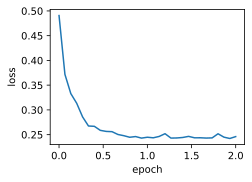

In [ ]:
#lr=0.01, gamma = 0.9, eps = 1e-6
d2l.train_ch7(rmsprop_6, init_rmsprop_states(),  {'lr':0.01, 'gamma':0.9}, features, labels)

loss: 0.242030, 0.067125 sec per epoch


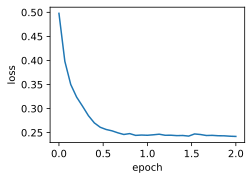

In [ ]:
#lr = 0.01, hyperparameter gamma = 0.9, 此时惩罚值eps=1e-8
d2l.train_ch7(rmsprop_8, init_rmsprop_states(), {'lr':0.01, 'gamma': 0.9}, features, labels)

可以看出当lr=0.01,gamma=0.9时，较为平滑地逼近最优值

loss: 0.659137, 0.059543 sec per epoch


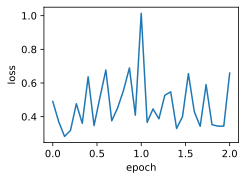

In [ ]:
#lr=0.1 hyperparameter gamma = 0.9
d2l.train_ch7(rmsprop_8, init_rmsprop_states(), {'lr': 0.4, 'gamma': 0.9}, features, labels)

**7.6.3 简介实现**

通过名称为`RMSprop`的优化器方法，我们便可使用PyTorch提供的RMSProp算法来训练模型。注意，超参数$\gamma$通过`alpha`指定。

loss: 0.243896, 0.069392 sec per epoch


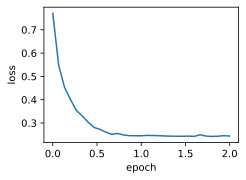

In [ ]:
#lr = 0.01, gamma = 0.9
d2l.train_pytorch_ch7(torch.optim.RMSprop, {'lr': 0.01, 'alpha':0.9}, features, labels)

**小结**

RMSProp算法和AdaGrad算法的不同在于，RMSProp算法使用了小批量随机梯度按元素平方的指数加权移动平均来调整学习率。

**7.7 AdaDelta算法**

除了RMSProp算法以外，另一个常用优化算法AdaDelta算法也针对AdaGrad算法在迭代后期可能较难找到有用解的问题做了改进 [1]。有意思的是，**AdaDelta算法没有学习率这一超参数**。

**7.7.1 算法**

AdaDelta算法也像RMSProp算法一样，使用了小批量随机梯度$\boldsymbol{g}_t$按元素平方的指数加权移动平均变量$\boldsymbol{s}_t$。在时间步0，它的所有元素被初始化为0。给定超参数$0 \leq \rho < 1$（对应RMSProp算法中的$\gamma$），在时间步$t>0$，同RMSProp算法一样计算

$$\boldsymbol{s}_t \leftarrow \rho \boldsymbol{s}_{t-1} + (1 - \rho) \boldsymbol{g}_t \odot \boldsymbol{g}_t. $$

与RMSProp算法不同的是，AdaDelta算法还维护一个额外的状态变量$\Delta\boldsymbol{x}_t$，其元素同样在时间步0时被初始化为0。我们使用$\Delta\boldsymbol{x}_{t-1}$来计算自变量的变化量：

$$ \boldsymbol{g}_t' \leftarrow \sqrt{\frac{\Delta\boldsymbol{x}_{t-1} + \epsilon}{\boldsymbol{s}_t + \epsilon}}   \odot \boldsymbol{g}_t, $$

其中$\epsilon$是为了维持数值稳定性而添加的常数，如$10^{-5}$。接着更新自变量：

$$\boldsymbol{x}_t \leftarrow \boldsymbol{x}_{t-1} - \boldsymbol{g}'_t. $$

最后，我们使用$\Delta\boldsymbol{x}_t$来记录自变量变化量$\boldsymbol{g}'_t$按元素平方的指数加权移动平均：

$$\Delta\boldsymbol{x}_t \leftarrow \rho \Delta\boldsymbol{x}_{t-1} + (1 - \rho) \boldsymbol{g}'_t \odot \boldsymbol{g}'_t. $$

可以看到，如不考虑$\epsilon$的影响，**AdaDelta算法跟RMSProp算法的不同之处在于使用$\sqrt{\Delta\boldsymbol{x}_{t-1}}$来替代学习率$\eta$**。

**7.7.2 从零开始实现**

AdaDelta算法需要对每个自变量维护两个状态变量，即$\boldsymbol{s}_t$和$\Delta\boldsymbol{x}_t$。我们按AdaDelta算法中的公式实现该算法。

In [ ]:
#读取数据
features, labels = get_data_ch7()

In [ ]:
#存储维护两个状态 s, x
def init_adadelta_states():
  #状态变量s
  s_w = torch.zeros((features.shape[1], 1), dtype=torch.float32)
  s_b = torch.zeros(1, dtype=torch.float32)
  #状态变量delta_x
  delta_w = torch.zeros((features.shape[1], 1), dtype=torch.float32)
  delta_b = torch.zeros(1, dtype=torch.float32)
  return ((s_w, delta_w), (s_b, delta_b))

#adadelta函数
def adadelta(params, states, hyperparams):
  rho, eps = hyperparams['rho'], 1e-5 #rho相对与gamma
  for p, (s, delta) in zip(params, states):
    s[:] = rho * s + (1 - rho) * (p.grad.data ** 2) #状态变量s的迭代使用指数加权移动平均法
    g = p.grad.data * torch.sqrt((delta + eps) / (s + eps)) #g的迭代公式, 忽略eps，则使用delta替换lr
    p.data -= g
    delta[:] = rho * delta + (1 - rho) * g * g

loss: 0.261174, 0.068068 sec per epoch


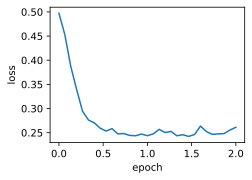

In [ ]:
#使用较小rho训练模型
d2l.train_ch7(adadelta, init_adadelta_states(), {'rho': 0.001}, features, labels)

loss: 0.242763, 0.075852 sec per epoch


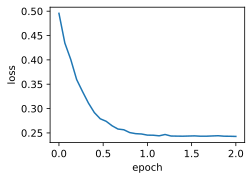

In [ ]:
#使用rho=0.9训练模型
d2l.train_ch7(adadelta, init_adadelta_states(), {'rho': 0.9}, features, labels)

**7.7.3 简洁实现**

通过名称为`Adadelta`的优化器方法，我们便可使用PyTorch提供的AdaDelta算法。它的超参数可以通过`rho`来指定。

loss: 0.254889, 0.070456 sec per epoch


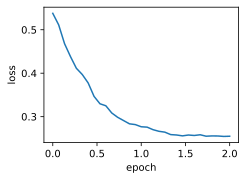

In [ ]:
#rho = 0.001
d2l.train_pytorch_ch7(torch.optim.Adadelta, {'rho': 0.001}, features, labels)

loss: 0.244973, 0.069659 sec per epoch


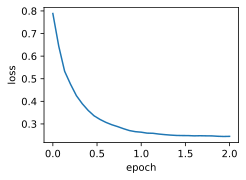

In [ ]:
#rho=0.99
d2l.train_pytorch_ch7(torch.optim.Adadelta, {'rho': 0.99}, features, labels)

**小结**

AdaDelta算法没有学习率超参数，它通过使用有关自变量更新量平方的指数加权移动平均的项来替代RMSProp算法中的学习率。

**7.8 Adam算法**

Adam算法在RMSProp算法基础上对小批量随机梯度也做了指数加权移动平均 [1]。下面我们来介绍这个算法。

> 所以Adam算法可以看做是RMSProp算法与动量法的结合。

**7.8.1 算法**

Adam算法使用了动量变量$\boldsymbol{v}_t$和RMSProp算法中小批量随机梯度按元素平方的指数加权移动平均变量$\boldsymbol{s}_t$，并在时间步0将它们中每个元素初始化为0。给定超参数$0 \leq \beta_1 < 1$（算法作者建议设为0.9），时间步$t$的动量变量$\boldsymbol{v}_t$即小批量随机梯度$\boldsymbol{g}_t$的指数加权移动平均：

$$\boldsymbol{v}_t \leftarrow \beta_1 \boldsymbol{v}_{t-1} + (1 - \beta_1) \boldsymbol{g}_t. $$

和RMSProp算法中一样，给定超参数$0 \leq \beta_2 < 1$（算法作者建议设为0.999），
将小批量随机梯度按元素平方后的项$\boldsymbol{g}_t \odot \boldsymbol{g}_t$做指数加权移动平均得到$\boldsymbol{s}_t$：

$$\boldsymbol{s}_t \leftarrow \beta_2 \boldsymbol{s}_{t-1} + (1 - \beta_2) \boldsymbol{g}_t \odot \boldsymbol{g}_t. $$

由于我们将$\boldsymbol{v}_0$和$\boldsymbol{s}_0$中的元素都初始化为0，
在时间步$t$我们得到$\boldsymbol{v}_t =  (1-\beta_1) \sum_{i=1}^t \beta_1^{t-i} \boldsymbol{g}_i$。将过去各时间步小批量随机梯度的权值相加，得到 $(1-\beta_1) \sum_{i=1}^t \beta_1^{t-i} = 1 - \beta_1^t$。需要注意的是，当$t$较小时，过去各时间步小批量随机梯度权值之和会较小。例如，当$\beta_1 = 0.9$时，$\boldsymbol{v}_1 = 0.1\boldsymbol{g}_1$。为了消除这样的影响，对于任意时间步$t$，我们可以将$\boldsymbol{v}_t$再除以$1 - \beta_1^t$，从而使过去各时间步小批量随机梯度权值之和为1。这也叫作偏差修正。在Adam算法中，我们对变量$\boldsymbol{v}_t$和$\boldsymbol{s}_t$均作偏差修正：

$$\hat{\boldsymbol{v}}_t \leftarrow \frac{\boldsymbol{v}_t}{1 - \beta_1^t}, $$

$$\hat{\boldsymbol{s}}_t \leftarrow \frac{\boldsymbol{s}_t}{1 - \beta_2^t}. $$


接下来，Adam算法使用以上偏差修正后的变量$\hat{\boldsymbol{v}}_t$和$\hat{\boldsymbol{s}}_t$，将模型参数中每个元素的学习率通过按元素运算重新调整：

$$\boldsymbol{g}_t' \leftarrow \frac{\eta \hat{\boldsymbol{v}}_t}{\sqrt{\hat{\boldsymbol{s}}_t} + \epsilon},$$

其中$\eta$是学习率，$\epsilon$是为了维持数值稳定性而添加的常数，如$10^{-8}$。和AdaGrad算法、RMSProp算法以及AdaDelta算法一样，目标函数自变量中每个元素都分别拥有自己的学习率。最后，使用$\boldsymbol{g}_t'$迭代自变量：

$$\boldsymbol{x}_t \leftarrow \boldsymbol{x}_{t-1} - \boldsymbol{g}_t'. $$

**7.8.2 从零开始实现**

我们按照Adam算法中的公式实现该算法。其中时间步$t$通过`hyperparams`参数传入`adam`函数。

In [ ]:
#读取数据
features, labels = get_data_ch7()

In [ ]:
#维持adam算法v，s的初始值
def init_adam_states():
  #v状态变量
  v_w = torch.zeros((features.shape[1], 1), dtype=torch.float32)
  v_b = torch.zeros(1, dtype=torch.float32)
  #s状态变量
  s_w = torch.zeros((features.shape[1], 1), dtype=torch.float32)
  s_b = torch.zeros(1, dtype=torch.float32)
  return ((v_w, s_w), (v_b, s_b))

#adam函数
def adam(params, states, hyperparams):
  beta1, beta2, eps = 0.9, 0.99, 1e-6 #beta1, beta2相当于gamma
  for p, (v, s) in zip(params, states):
    v[:] = beta1 * v + (1 - beta1) * p.grad.data #v的迭代公式
    s[:] = beta2 * s + (1 - beta2) * p.grad.data ** 2 #s的迭代公式
    #v和s的偏差修正
    v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
    s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
    #梯度更新
    p.data -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr) + eps)
    hyperparams['t'] += 1


loss: 0.329941, 0.071018 sec per epoch


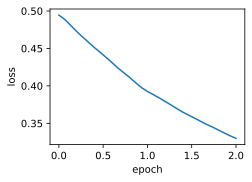

In [ ]:
#lr = 0.001
d2l.train_ch7(adam, init_adam_states(), {'lr':0.001, 't':1}, features, labels)

loss: 0.243577, 0.066356 sec per epoch


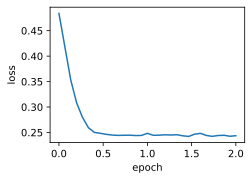

In [ ]:
#lr = 0.01
d2l.train_ch7(adam, init_adam_states(), {'lr':0.01, 't': 1}, features, labels)

loss: 0.272402, 0.067080 sec per epoch


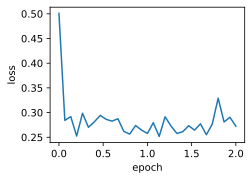

In [ ]:
#lr = 0.1
d2l.train_ch7(adam, init_adam_states(), {'lr': 0.1, 't': 1}, features, labels)

**7.8.3 简洁实现**

通过名称为“Adam”的优化器实例，我们便可使用PyTorch提供的Adam算法。

loss: 0.244238, 0.071464 sec per epoch


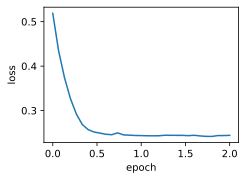

In [ ]:
d2l.train_pytorch_ch7(torch.optim.Adam, {'lr': 0.01}, features, labels)

**小结**

* Adam算法在RMSProp算法的基础上对小批量随机梯度也做了指数加权移动平均。
* Adam算法使用了偏差修正。